# Qaintellect Training Example

In this example, we will demonstrate the optimisation of a quantum circuit using Qaintellect's Flux integration.

In [1]:
include("../src/Qaintellect.jl")
using .Qaintellect

using Flux, LinearAlgebra, Test
using Flux.Optimise: update!
using IterTools: ncycle

## Task: Flipping A Qubit
In the first task, we would like to optimize a circuit such that it flips a qubit from state $\lvert 0 \rangle$ to $\rvert 1 \rangle$. We begin by constructing a simple circuit consisting of two rotation gates: an $R_{x}$ gate and an $R_{y}$ gate

<div>
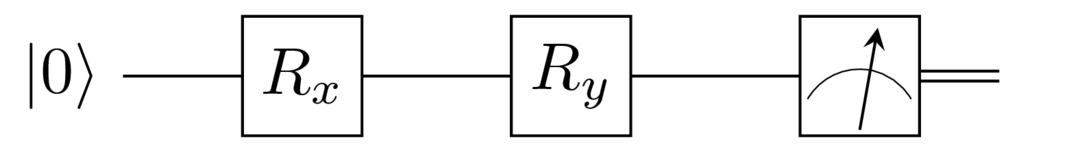
</div>

where:

$$
R_{x}(\phi_{1}) = \left( \begin{array}{cc} cos\frac{\phi_{1}}{2}& -isin\frac{\phi_{1}}{2}\\ -sin\frac{\phi_{1}}{2}& cos\frac{\phi_{1}}{2} \end{array} \right)\\
R_{y}(\phi_{2}) = \left( \begin{array}{cc} cos\frac{\phi_{2}}{2}& -sin\frac{\phi_{2}}{2}\\ sin\frac{\phi_{2}}{2}& cos\frac{\phi_{2}}{2} \end{array} \right)
$$

We create Qaintessent $R_{x}$ and $ R_{y}$ AbstractGate objects. We randomize the initial rotation angles for these gates.

In [2]:
N = 1
ϕ1 = rand(Float64, 1)
rx = RxGate(ϕ1...)
println("ϕ1 is: " * string(ϕ1))

ϕ2 = rand(Float64, 1)
ry = RyGate(ϕ2...)
println("ϕ2 is: " * string(ϕ2))

ϕ1 is: [0.46246744121673045]
ϕ2 is: [0.08928123199129057]


Then, we setup the Circuit object using these gates. We use the Pauli-$Y$ matrix as an observable, noting that measuring with this observable yields $-1$ when measuring the target $ \lvert 1 \rangle$ state.

In [3]:
cgc = CircuitGateChain{N}([
    single_qubit_circuit_gate(1, rx, N),
    single_qubit_circuit_gate(1, ry, N),
])

# Using pauli-y matrix as observable
meas = MeasurementOps{N}([1 0; 0 -1])

c = Circuit(cgc, meas)


    1 —[Rx]——[Ry]—


We set the initial input as the $\lvert 0 \rangle$ state, and the targetted expectation value of the measurement as $-1$.

In [4]:
ψ = [1.0, 0.0]
e = -1

-1

Now, we define a cost function `loss()` using the Flux mean-squared error function. We also gather the trainable params from our created circuit using the Flux.params function. We arbitrarily choose the simple Flux Descent optimizer. We also create the `evalcb()` to intermittently output the loss of our cost function.

In [5]:
# create loss function
loss(x,y) = Flux.mse(c(x), y)

# gather parameters from Circuit
paras = Flux.params(c)

# define optimizer
opt = Descent(1.5)

Descent(1.5)

Finally, we use `ncycle()` to repeatedly feed our input quantum state into the training scheme and start the training.

In [6]:
for i in 1:500
    gs = gradient(() -> loss(ψ, e), paras)
    Flux.update!(opt, paras, gs)
    println("Cost: " * string(loss(ψ, e)))
end

for gate in c.cgc
    println(gate)
end

Cost: 0.023707841180104303
Cost: 0.002602337711534467
Cost: 0.0013696531550124711
Cost: 0.0008653504639922053
Cost: 0.0006023229421980444
Cost: 0.00044579844631243803
Cost: 0.0003443951651940234
Cost: 0.00027464521716670493
Cost: 0.00022447016262300612
Cost: 0.00018709566332079437
Cost: 0.00015846614072406322
Cost: 0.0001360255430059488
Cost: 0.00011809433288686393
Cost: 0.00010353013370483653
Cost: 9.153296955550762e-5
Cost: 8.152850700165572e-5
Cost: 7.309541901567619e-5
Cost: 6.591873536063305e-5
Cost: 5.9759040482302415e-5
Cost: 5.443163388860404e-5
Cost: 4.979212319694282e-5
Cost: 4.57262704991179e-5
Cost: 4.214271140226171e-5
Cost: 3.8967651695465375e-5
Cost: 3.6140949212490885e-5
Cost: 3.3613181311909807e-5
Cost: 3.1343423808990704e-5
Cost: 2.929755027121893e-5
Cost: 2.7446916560994136e-5
Cost: 2.5767333809485857e-5
Cost: 2.423825959256213e-5
Cost: 2.284215578211849e-5
Cost: 2.156397486543701e-5
Cost: 2.039074612007136e-5
Cost: 1.931124001846727e-5
Cost: 1.8315694374838247e-5
Co

Cost: 1.929707471406542e-7
Cost: 1.9195582385458493e-7
Cost: 1.9094889095069948e-7
Cost: 1.8994986473765912e-7
Cost: 1.889586626164683e-7
Cost: 1.8797520306444056e-7
Cost: 1.869994056188898e-7
Cost: 1.860311908594049e-7
Cost: 1.8507048039284038e-7
Cost: 1.8411719683583065e-7
Cost: 1.8317126380123977e-7
Cost: 1.8223260588136829e-7
Cost: 1.813011486331752e-7
Cost: 1.8037681856434886e-7
Cost: 1.7945954311748363e-7
Cost: 1.78549250656526e-7
Cost: 1.7764587045301612e-7
Cost: 1.7674933267138328e-7
Cost: 1.7585956835712945e-7
Cost: 1.7497650942125692e-7
Cost: 1.7410008862915871e-7
Cost: 1.7323023958687159e-7
Cost: 1.7236689672925428e-7
Cost: 1.7150999530573693e-7
Cost: 1.7065947137093053e-7
Cost: 1.6981526177077095e-7
Cost: 1.6897730413057363e-7
Cost: 1.681455368452394e-7
Cost: 1.6731989906585284e-7
Cost: 1.6650033069070872e-7
Cost: 1.6568677235165305e-7
Cost: 1.6487916540636807e-7
Cost: 1.6407745192579707e-7
Cost: 1.632815746831629e-7
Cost: 1.6249147714643268e-7
Cost: 1.6170710346586734e-7
C

We can then verify that our trained circuit now produces the required output.

In [7]:
@test apply(c, ψ)[1] ≈ -1.0 rtol=1e-3

Test Passed